In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = np.array(pd.read_csv('train.csv'))
m, n = data.shape
np.random.shuffle(data)

data_cv = data[0:1000].T
Y_cv = data_cv[0]
X_cv = data_cv[1:n]
X_cv = X_cv/255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255
_, m_train = X_train.shape

In [4]:
X_train.T[0].shape

(784,)

In [5]:
def init_params():
    W1 = np.random.randn(10,784) *0.01
    b1 = np.random.randn(10,1) *0.01
    W2 = np.random.randn(10,10) *0.01
    b2 = np.random.randn(10,1) *0.01

    return W1, b1, W2, b2

def ReLu(Z):
    return np.maximum(0,Z)

def softmax(z):
    e_z = np.exp(z-np.max(z))
    a = e_z/np.sum(e_z, axis=0)

    return a

def forward_prop(W1, b1, W2, b2, X):
    Z1 = np.dot(W1, X) + b1
    A1 = ReLu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1, A1, Z2, A2, W1, W2, X, y):
    # print(one_hot_Y)
    dZ2 = A2 - y
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2,axis=1)

    dZ1 = np.dot(W2.T, dZ2)*ReLU_deriv(Z1)
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1,axis=1)

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    # print(db2.shape, b2.shape, db1.shape, b1.shape)
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*np.reshape(db1,(10,1))
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*np.reshape(db2,(10,1))

    return W1, b1, W2, b2

In [6]:
def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

costs = []

def gradient_descent(X, Y, alpha, epochs):
    W1, b1, W2, b2 = init_params()
    one_hot_Y = one_hot(Y)
    m = Y.shape[0]
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, one_hot_Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        costs.append((-1/m)*np.sum(one_hot_Y*np.log(A2)))
        
        if i%100 == 0 or i == epochs-1:
            print('Iteration: ', i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))

    return W1, b1, W2, b2

In [7]:
learning_rate = 0.1
epochs = 10000
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, learning_rate, epochs)

Iteration:  0
[9 9 9 ... 9 9 9] [1 0 2 ... 3 4 8]
0.10007317073170732
Iteration:  100
[1 0 2 ... 3 7 3] [1 0 2 ... 3 4 8]
0.5055853658536585
Iteration:  200
[1 0 2 ... 3 4 8] [1 0 2 ... 3 4 8]
0.8039268292682927
Iteration:  300
[1 0 2 ... 3 4 8] [1 0 2 ... 3 4 8]
0.8614878048780488
Iteration:  400
[1 0 2 ... 3 4 8] [1 0 2 ... 3 4 8]
0.8827317073170732
Iteration:  500
[1 0 2 ... 3 4 8] [1 0 2 ... 3 4 8]
0.8934390243902439
Iteration:  600
[1 0 2 ... 3 4 8] [1 0 2 ... 3 4 8]
0.9000487804878049
Iteration:  700
[1 0 2 ... 3 4 8] [1 0 2 ... 3 4 8]
0.9048780487804878
Iteration:  800
[1 0 2 ... 3 4 8] [1 0 2 ... 3 4 8]
0.9091707317073171
Iteration:  900
[1 0 2 ... 3 4 8] [1 0 2 ... 3 4 8]
0.9126829268292683
Iteration:  1000
[1 0 2 ... 3 4 8] [1 0 2 ... 3 4 8]
0.9157804878048781
Iteration:  1100
[1 0 2 ... 3 4 8] [1 0 2 ... 3 4 8]
0.9184390243902439
Iteration:  1200
[1 0 2 ... 3 4 8] [1 0 2 ... 3 4 8]
0.9191951219512196
Iteration:  1300
[1 0 2 ... 3 4 8] [1 0 2 ... 3 4 8]
0.9210243902439025
Ite

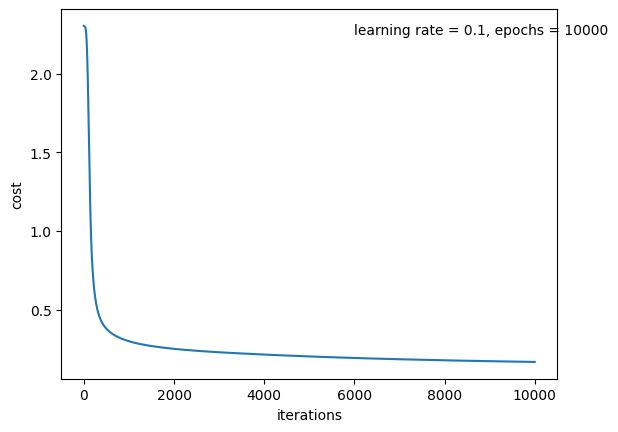

In [8]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.text(6000,2.25, f'learning rate = {learning_rate}, epochs = {epochs}')
plt.show()

In [9]:
Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_cv)
predictions = get_predictions(A2)
print(get_accuracy(predictions, Y_cv))

[3 9 8 2 1 3 5 9 1 2 1 2 2 1 1 5 0 9 3 5 3 2 0 2 4 4 4 8 0 1 0 8 3 5 2 1 4
 7 4 4 5 9 3 9 9 7 5 1 3 6 8 6 7 5 3 7 0 9 3 2 2 6 1 3 7 4 9 8 9 1 3 3 4 1
 3 9 7 8 0 1 1 1 6 5 8 3 4 2 7 6 8 2 7 0 2 4 3 9 3 3 8 5 8 7 0 1 1 0 4 5 6
 4 2 9 5 0 2 4 7 4 6 3 0 3 1 6 5 0 7 0 7 6 8 0 6 9 1 1 0 7 6 4 4 3 8 6 6 4
 1 3 8 8 3 7 0 7 1 2 9 6 8 3 8 9 4 0 0 4 2 4 2 1 8 3 0 1 5 0 9 2 2 9 4 1 3
 2 1 8 0 0 6 7 3 0 7 6 7 6 3 5 6 4 5 4 3 1 5 2 9 8 3 2 0 4 9 5 8 8 5 7 0 6
 8 1 2 6 0 0 8 7 4 7 6 6 8 9 3 2 9 9 2 7 8 5 0 9 6 2 1 2 1 4 0 8 4 8 3 1 5
 5 8 9 3 9 4 4 9 5 6 4 5 1 0 4 2 3 7 8 2 0 5 9 0 7 3 2 3 0 5 8 9 7 2 2 7 5
 2 8 0 6 8 0 1 2 5 0 4 7 3 6 9 7 1 4 6 8 3 1 3 6 5 5 0 7 1 6 1 1 4 3 1 0 3
 0 2 3 5 2 8 9 0 2 8 7 3 4 1 7 9 3 4 1 7 6 6 2 5 2 4 4 1 0 8 3 4 0 3 8 1 4
 5 9 1 6 6 4 3 6 7 6 8 9 9 6 2 7 2 4 9 6 3 2 4 8 3 4 6 7 7 3 7 1 9 7 0 1 4
 2 6 2 6 0 8 8 3 8 0 4 0 0 6 1 9 0 0 4 3 9 5 2 2 2 0 1 7 1 1 6 6 3 1 9 7 9
 6 5 9 9 4 7 6 2 4 0 4 4 0 4 3 4 5 7 2 1 4 4 1 7 0 7 4 4 6 9 6 9 7 7 2 3 4
 5 8 3 9 8 0 4 5 1 0 2 1 

In [10]:
data_test = np.array(pd.read_csv('test.csv'))
data_test = data_test.T
X_test = data_test/255
Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_test)
predictions = get_predictions(A2)
print(predictions)

[2 0 9 ... 3 9 2]


In [11]:
print(X_test.T[1].shape)

(784,)


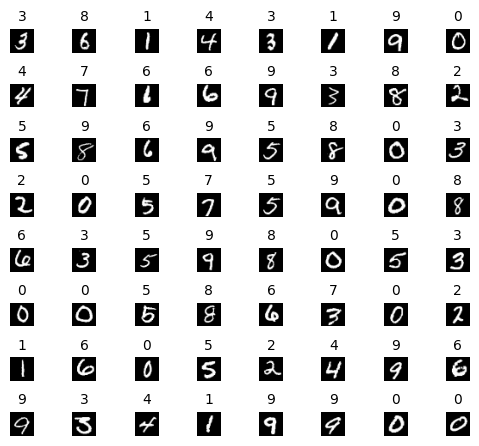

In [12]:
m_test, n_test = X_test.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
     # Select random indices
    random_index = np.random.randint(m_test)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_test.T[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    ax.set_title(f"{predictions[random_index]}",fontsize=10)
    ax.set_axis_off()

plt.show()

In [13]:
df = pd.DataFrame(predictions)

df.rename(columns={0: 'Label'}, inplace=True)
# df.rename_axis('ImageId', inplace=True)

In [14]:
df['ImageId'] = df.index + 1
col = df.pop('ImageId')
df.insert(0, col.name, col)
df.to_csv('submission.csv', index=False)

In [15]:
print(f'Train Accuracy: {get_accuracy(get_predictions(forward_prop(W1, b1, W2, b2, X_train)[3]), Y_train)*100:.2f}%')
print(f'CV Accuracy: {get_accuracy(get_predictions(forward_prop(W1, b1, W2, b2, X_cv)[3]), Y_cv)*100:.2f}%')

[1 0 2 ... 3 4 8] [1 0 2 ... 3 4 8]
Train Accuracy: 95.23%
[3 9 8 2 1 3 5 9 1 2 1 2 2 1 1 5 0 9 3 5 3 2 0 2 4 4 4 8 0 1 0 8 3 5 2 1 4
 7 4 4 5 9 3 9 9 7 5 1 3 6 8 6 7 5 3 7 0 9 3 2 2 6 1 3 7 4 9 8 9 1 3 3 4 1
 3 9 7 8 0 1 1 1 6 5 8 3 4 2 7 6 8 2 7 0 2 4 3 9 3 3 8 5 8 7 0 1 1 0 4 5 6
 4 2 9 5 0 2 4 7 4 6 3 0 3 1 6 5 0 7 0 7 6 8 0 6 9 1 1 0 7 6 4 4 3 8 6 6 4
 1 3 8 8 3 7 0 7 1 2 9 6 8 3 8 9 4 0 0 4 2 4 2 1 8 3 0 1 5 0 9 2 2 9 4 1 3
 2 1 8 0 0 6 7 3 0 7 6 7 6 3 5 6 4 5 4 3 1 5 2 9 8 3 2 0 4 9 5 8 8 5 7 0 6
 8 1 2 6 0 0 8 7 4 7 6 6 8 9 3 2 9 9 2 7 8 5 0 9 6 2 1 2 1 4 0 8 4 8 3 1 5
 5 8 9 3 9 4 4 9 5 6 4 5 1 0 4 2 3 7 8 2 0 5 9 0 7 3 2 3 0 5 8 9 7 2 2 7 5
 2 8 0 6 8 0 1 2 5 0 4 7 3 6 9 7 1 4 6 8 3 1 3 6 5 5 0 7 1 6 1 1 4 3 1 0 3
 0 2 3 5 2 8 9 0 2 8 7 3 4 1 7 9 3 4 1 7 6 6 2 5 2 4 4 1 0 8 3 4 0 3 8 1 4
 5 9 1 6 6 4 3 6 7 6 8 9 9 6 2 7 2 4 9 6 3 2 4 8 3 4 6 7 7 3 7 1 9 7 0 1 4
 2 6 2 6 0 8 8 3 8 0 4 0 0 6 1 9 0 0 4 3 9 5 2 2 2 0 1 7 1 1 6 6 3 1 9 7 9
 6 5 9 9 4 7 6 2 4 0 4 4 0 4 3 4 5 7 2 1 